In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import json
import pandas as pd

# Load JSON Lines data
data = []
with open('Cell_Phones_and_Accessories.json', 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))  
        

In [3]:
df = pd.DataFrame(data) 

In [4]:
df.head(5) 

,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class
0,{'$oid': '5a1321d5741a2384e802c552'},A3HVRXV0LVJN7,0110400550,BiancaNicole,"[4, 4]",Best phone case ever . Everywhere I go I get a...,5.0,A++++,1358035200,"01 13, 2013",Cell_Phones_and_Accessories,1.0
1,{'$oid': '5a1321d5741a2384e802c557'},A1BJGDS0L1IO6I,0110400550,"cf ""t""","[0, 3]",ITEM NOT SENT from Blue Top Company in Hong Ko...,1.0,ITEM NOT SENT!!,1359504000,"01 30, 2013",Cell_Phones_and_Accessories,0.0
2,{'$oid': '5a1321d5741a2384e802c550'},A1YX2RBMS1L9L,0110400550,Andrea Busch,"[0, 0]",Saw this same case at a theme park store for 2...,5.0,Great product,1353542400,"11 22, 2012",Cell_Phones_and_Accessories,1.0
3,{'$oid': '5a1321d5741a2384e802c553'},A180NNPPKWCCU0,0110400550,Aniya pennington,"[3, 3]",case fits perfectly and I always gets complime...,5.0,Perfect,1374105600,"07 18, 2013",Cell_Phones_and_Accessories,1.0
4,{'$oid': '5a1321d5741a2384e802c559'},A30P2CYOUYAJM8,0110400550,Gene,"[1, 1]",I got this for my 14 year old sister. She lov...,4.0,Cool purchase.,1363737600,"03 20, 2013",Cell_Phones_and_Accessories,1.0


In [5]:
# Drop unwanted columns
unwanted_columns = ['_id','reviewerID', 'asin', 'reviewerName','helpful', 'unixReviewTime', 'reviewTime', 'category']
df = df.drop(columns=unwanted_columns)

In [6]:
df= df.rename(columns={"reviewText":"Review","overall": "Rating"})

In [7]:
df.head(5)

,Review,Rating,summary,class
0,Best phone case ever . Everywhere I go I get a...,5.0,A++++,1.0
1,ITEM NOT SENT from Blue Top Company in Hong Ko...,1.0,ITEM NOT SENT!!,0.0
2,Saw this same case at a theme park store for 2...,5.0,Great product,1.0
3,case fits perfectly and I always gets complime...,5.0,Perfect,1.0
4,I got this for my 14 year old sister. She lov...,4.0,Cool purchase.,1.0


In [8]:
df.shape

(3185845, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185845 entries, 0 to 3185844
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Review   object 
 1   Rating   float64
 2   summary  object 
 3   class    float64
dtypes: float64(2), object(2)
memory usage: 97.2+ MB


In [10]:
df.isnull().sum()

Review     0
Rating     0
summary    0
class      0
dtype: int64

In [11]:
df.describe()

,Rating,class
count,3.185845e+06,3.185845e+06
mean,3.893530e+00,7.078141e-01
std,1.432947e+00,4.547674e-01
min,1.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00
50%,5.000000e+00,1.000000e+00
75%,5.000000e+00,1.000000e+00
max,5.000000e+00,1.000000e+00


In [12]:
df['Rating']= df['Rating'].astype(int)
df['class']= df['class'].astype(int)

In [13]:
df.head()

,Review,Rating,summary,class
0,Best phone case ever . Everywhere I go I get a...,5,A++++,1
1,ITEM NOT SENT from Blue Top Company in Hong Ko...,1,ITEM NOT SENT!!,0
2,Saw this same case at a theme park store for 2...,5,Great product,1
3,case fits perfectly and I always gets complime...,5,Perfect,1
4,I got this for my 14 year old sister. She lov...,4,Cool purchase.,1


In [14]:
df.tail()

,Review,Rating,summary,class
3185840,The case is nice. I have no problem with it. T...,4,Good.,1
3185841,I&#8217;ve tried many armbands and I must say ...,5,It is very comfortable and simple to use,1
3185842,"Good cables, both cables work and they are com...",5,Recommended,1
3185843,Great products. and Great services !,5,Five Stars,1
3185844,"nice, made several purchases for these cables,...",5,good,1


In [15]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185845 entries, 0 to 3185844
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Review   object
 1   Rating   int32 
 2   summary  object
 3   class    int32 
dtypes: int32(2), object(2)
memory usage: 72.9+ MB


In [16]:
# Check how many duplicates exist
duplicates = df.duplicated(subset='Review').sum()
print(f"Number of duplicate reviews: {duplicates}") 

Number of duplicate reviews: 12529


In [17]:
# Remove duplicate reviews
df = df.drop_duplicates(subset='Review', keep='first')

In [18]:
# Check new shape after removing duplicates
print("New shape of the dataset:", df.shape)

New shape of the dataset: (3173316, 4)


In [19]:
df['Review'] = df['Review'].fillna('')

In [20]:
df['review_len'] = df['Review'].apply(lambda x: len(x.split(' ')))


In [21]:
df.head(5)

,Review,Rating,summary,class,review_len
0,Best phone case ever . Everywhere I go I get a...,5,A++++,1,23
1,ITEM NOT SENT from Blue Top Company in Hong Ko...,1,ITEM NOT SENT!!,0,32
2,Saw this same case at a theme park store for 2...,5,Great product,1,21
3,case fits perfectly and I always gets complime...,5,Perfect,1,20
4,I got this for my 14 year old sister. She lov...,4,Cool purchase.,1,22


# Exploratory Data Analysis

In [22]:
class_counts = df['class'].value_counts()
print(class_counts)

class
1    2243464
0     929852
Name: count, dtype: int64


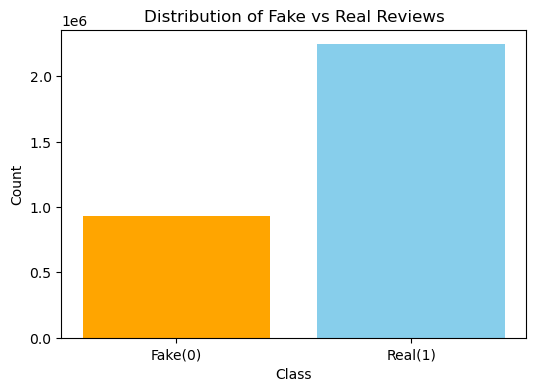

Class Distribution : 
 class
1    2243464
0     929852
Name: count, dtype: int64

Percentage Distribution : 
 class
1    70.7
0    29.3
Name: count, dtype: float64


In [23]:
# Class Distribution (Fake vs Real Reviews)
plt.figure(figsize=(6,4))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'orange'])
plt.xticks([0,1], ['Fake(0)', 'Real(1)'])
plt.title('Distribution of Fake vs Real Reviews')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print("Class Distribution : \n", class_counts)
print("\nPercentage Distribution : \n", round((class_counts / len(df)) * 100, 2))

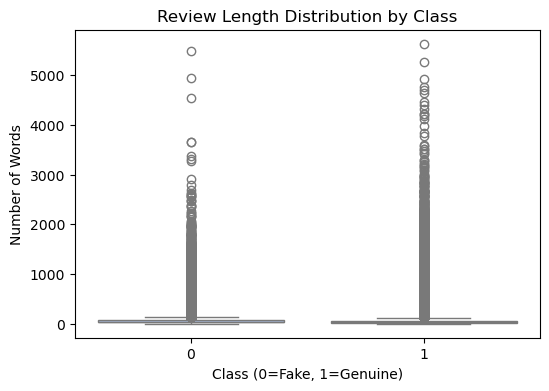

           count       mean        std  min   25%   50%   75%     max
class                                                                
0       929852.0  63.414113  74.990307  1.0  26.0  40.0  72.0  5480.0
1      2243464.0  60.707567  81.508499  1.0  24.0  35.0  65.0  5632.0


In [24]:
# Review Length Analysis
plt.figure(figsize=(6,4))
sns.boxplot(x='class', y='review_len', data=df, palette='coolwarm')
plt.title('Review Length Distribution by Class')
plt.xlabel('Class (0=Fake, 1=Genuine)')
plt.ylabel('Number of Words')
plt.show()

print(df.groupby('class')['review_len'].describe())


# Text Preprocessing

In [25]:
import re
import string

In [26]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [27]:
df['review_clean']=df['Review'].apply(clean_text)

In [28]:
df.head()

,Review,Rating,summary,class,review_len,review_clean
0,Best phone case ever . Everywhere I go I get a...,5,A++++,1,23,best phone case ever everywhere i go i get a ...
1,ITEM NOT SENT from Blue Top Company in Hong Ko...,1,ITEM NOT SENT!!,0,32,item not sent from blue top company in hong ko...
2,Saw this same case at a theme park store for 2...,5,Great product,1,21,saw this same case at a theme park store for ...
3,case fits perfectly and I always gets complime...,5,Perfect,1,20,case fits perfectly and i always gets complime...
4,I got this for my 14 year old sister. She lov...,4,Cool purchase.,1,22,i got this for my year old sister she loves ...


# Tokenization and Stop Removal

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [30]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
stop_words = set(stopwords.words('english'))    

In [32]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [33]:
df['review_clean']= df['review_clean'].apply(preprocess_text)

In [34]:
df.head()

,Review,Rating,summary,class,review_len,review_clean
0,Best phone case ever . Everywhere I go I get a...,5,A++++,1,23,best phone case ever everywhere go get ton com...
1,ITEM NOT SENT from Blue Top Company in Hong Ko...,1,ITEM NOT SENT!!,0,32,item sent blue top company hong kong two month...
2,Saw this same case at a theme park store for 2...,5,Great product,1,21,saw case theme park store dollars good quality...
3,case fits perfectly and I always gets complime...,5,Perfect,1,20,case fits perfectly always gets compliments ha...
4,I got this for my 14 year old sister. She lov...,4,Cool purchase.,1,22,got year old sister loves really really dont c...


# Lemmatization

In [35]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [36]:
lemmatizer = WordNetLemmatizer()

In [37]:
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

In [38]:
df['review_clean'] = df['review_clean'].apply(lemmatize_text)

In [39]:
df.head()

,Review,Rating,summary,class,review_len,review_clean
0,Best phone case ever . Everywhere I go I get a...,5,A++++,1,23,best phone case ever everywhere go get ton com...
1,ITEM NOT SENT from Blue Top Company in Hong Ko...,1,ITEM NOT SENT!!,0,32,item sent blue top company hong kong two month...
2,Saw this same case at a theme park store for 2...,5,Great product,1,21,saw case theme park store dollar good quality ...
3,case fits perfectly and I always gets complime...,5,Perfect,1,20,case fit perfectly always get compliment hasnt...
4,I got this for my 14 year old sister. She lov...,4,Cool purchase.,1,22,got year old sister love really really dont co...


# Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df['review_clean'] # features (cleaned text)
y = df['class'] # labels (0 = fake, 1 = real)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF - IDF Vectorization

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [43]:
X_train_tfidf.shape, X_test_tfidf.shape

((2538652, 5000), (634664, 5000))

# Logistic Regression

In [44]:
from sklearn.metrics import precision_score, recall_score , f1_score, accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression


In [61]:
lr = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [62]:
# Training Accuracy
train_acc_lr = lr.score(X_train_tfidf, y_train)

In [63]:
# Test Predictions
y_pred_lr = lr.predict(X_test_tfidf)

In [64]:
# Test metrics
val_accuracy_lr = accuracy_score(y_test, y_pred_lr)
val_precision_lr = precision_score(y_test, y_pred_lr, average = 'weighted')
val_recall_lr = recall_score(y_test, y_pred_lr, average = 'weighted')
val_f1_lr = f1_score(y_test, y_pred_lr, average = 'weighted')

In [65]:
# Print metrics
print(f"The training accuracy for logistic regression : {(train_acc_lr*100):0.2f}%\n")
print(f"The validation accuracy for logistic regression : {(val_accuracy_lr*100):0.2f}%\n")
print(f"The precision for logistic regression : {val_precision_lr:0.2f}\n")
print(f"The recall for logistic regression : {val_recall_lr:0.2f}\n")
print(f"The f1 score for logistic regression : {val_f1_lr:0.2f}\n")

The training accuracy for logistic regression : 86.52%

The validation accuracy for logistic regression : 86.38%

The precision for logistic regression : 0.88

The recall for logistic regression : 0.86

The f1 score for logistic regression : 0.87



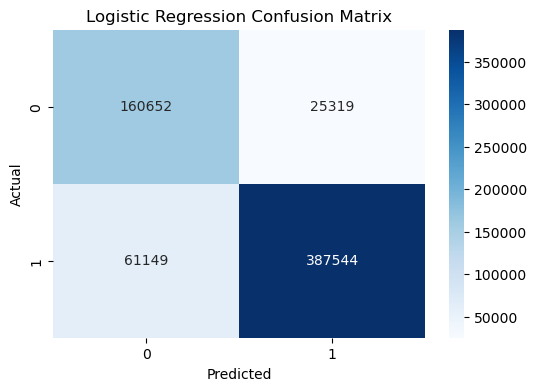

In [66]:
# Confusion Matrix
lr_cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Support Vector Machine

In [51]:
from sklearn.svm import LinearSVC

In [67]:
# Initialize and train the model
svm = LinearSVC(random_state=42, class_weight='balanced')
svm.fit(X_train_tfidf, y_train)

LinearSVC(class_weight='balanced', random_state=42)

In [68]:
# Training accuracy
train_acc_svm = svm.score(X_train_tfidf, y_train)

In [77]:
# Test predictions
y_pred_svm = svm.predict(X_test_tfidf)

In [70]:
# Test metrics
val_accuracy_svm = accuracy_score(y_test, y_pred_svm)
val_precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
val_recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
val_f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

In [71]:
# Print results
print(f"The training accuracy for SVM : {(train_acc_svm*100):0.2f}%\n")
print(f"The validation accuracy for SVM : {(val_accuracy_svm*100):0.2f}%\n")
print(f"The precision for SVM : {val_precision_svm:0.2f}\n")
print(f"The recall for SVM : {val_recall_svm:0.2f}\n")
print(f"The f1 score for SVM : {val_f1_svm:0.2f}\n")

The training accuracy for SVM : 86.58%

The validation accuracy for SVM : 86.41%

The precision for SVM : 0.88

The recall for SVM : 0.86

The f1 score for SVM : 0.87



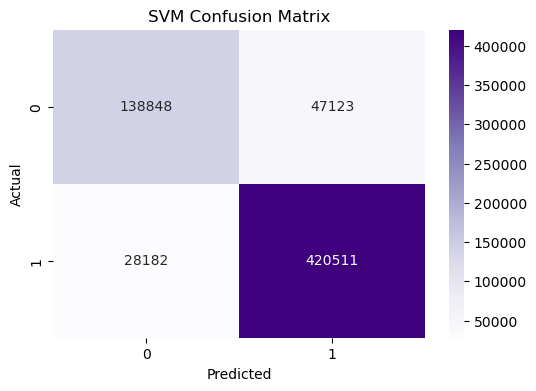

In [57]:
# Confusion Matrix
svm_cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


Model Comparison:


,Model,Training Accuracy,Validation Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.865156,0.863758,0.875860,0.863758,0.866910
1,SVM (LinearSVC),0.865767,0.864104,0.876411,0.864104,0.867282


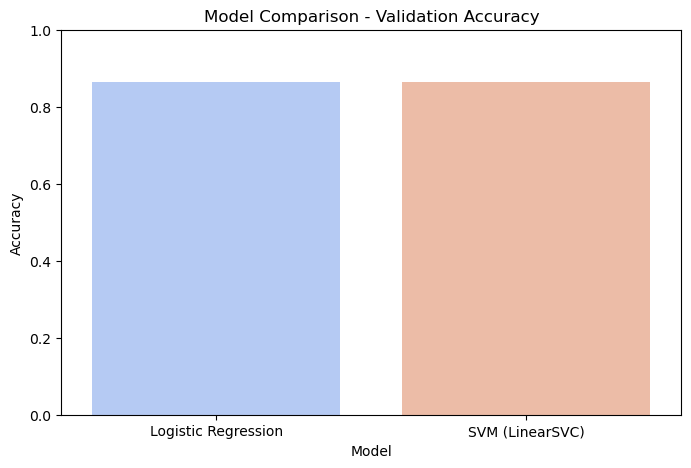

In [72]:
# Compare model performances
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM (LinearSVC)'],
    'Training Accuracy': [train_acc_lr, train_acc_svm],
    'Validation Accuracy': [val_accuracy_lr, val_accuracy_svm],
    'Precision': [val_precision_lr, val_precision_svm],
    'Recall': [val_recall_lr, val_recall_svm],
    'F1 Score': [val_f1_lr, val_f1_svm]
})

print("\nModel Comparison:")
display(results)

# Bar plot comparison
plt.figure(figsize=(8,5))
sns.barplot(data=results, x='Model', y='Validation Accuracy', palette='coolwarm')
plt.title("Model Comparison - Validation Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


In [91]:
import joblib

In [92]:
# Save SVM Model
joblib.dump(svm, 'svm_fake_review_model.pkl')

['svm_fake_review_model.pkl']

In [93]:
# Save TF-IDF Vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [94]:
print("SVM model and TF-IDF vectorizer have been saved.")

SVM model and TF-IDF vectorizer have been saved.


In [100]:
# Test loading the saved model and vectorizer
loaded_svm = joblib.load('svm_fake_review_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Test prediction with loaded model
test_review = ["This product is amazing and works perfectly!"]
test_review_clean = clean_text(test_review[0])
test_review_clean = preprocess_text(test_review_clean)
test_review_clean = lemmatize_text(test_review_clean)

test_tfidf = loaded_vectorizer.transform([test_review_clean])
prediction = loaded_svm.predict(test_tfidf)

print(f"Prediction: {'Fake' if prediction[0] == 0 else 'Real'}")

Prediction: Real


In [101]:
def predict_review(text, model, vectorizer):
    # Apply the same preprocessing steps
    text_clean = clean_text(text)
    text_clean = preprocess_text(text_clean)
    text_clean = lemmatize_text(text_clean)
    
    # Transform using saved vectorizer
    text_tfidf = vectorizer.transform([text_clean])
    
    # Predict
    prediction = model.predict(text_tfidf)
    probability = model.decision_function(text_tfidf)
    
    return {
        'prediction': 'Fake' if prediction[0] == 0 else 'Real',
        'confidence': abs(probability[0])
    }

# Usage example
result = predict_review("This product is terrible!", loaded_svm, loaded_vectorizer)
print(result)

{'prediction': 'Fake', 'confidence': 2.4390209876084614}
